<a href="https://colab.research.google.com/github/pathu-12/Caption_Bot_Server/blob/main/EXP_2_LOGESTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import power_transform, OneHotEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import probplot
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report
import warnings
from sklearn import set_config
set_config(display='diagram')

In [74]:
df = pd.read_csv("titanic.csv")

In [75]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EXPLORETORY DATA ANALYSIS(EDA)

In [79]:
# remove passenger_id,Name,Ticket
df.drop(labels=["PassengerId","Name","Ticket"], axis=1, inplace=True)

In [80]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Handling Missing Values

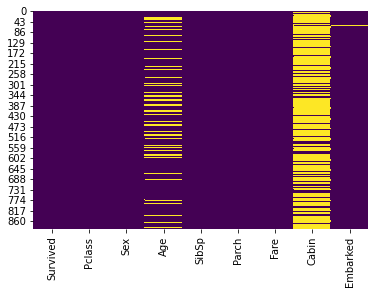

In [81]:
# check for missing values
sns.heatmap(df.isna(),cbar=False,cmap="viridis")

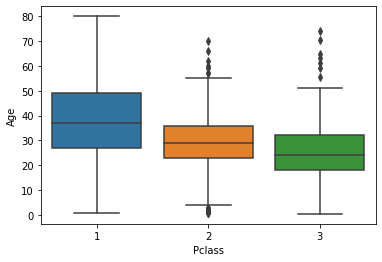

In [82]:
#plot boxplot for age to fill the missing values 
sns.boxplot(x="Pclass",y="Age", data=df)

In [83]:
def fill_age(cols):
    pclass = cols[0]
    age = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 27
        else:
            return 23
    else:
        return age

In [84]:
df["Age"]=df[["Pclass","Age"]].apply(fill_age, axis=1)

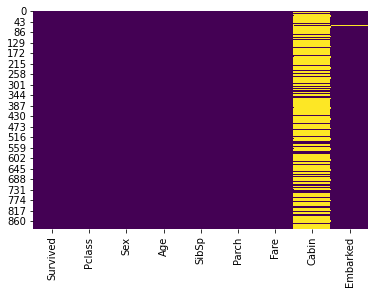

In [85]:
sns.heatmap(df.isna(),cbar=False,cmap="viridis")

In [86]:
#fill missing values in cabin
def fill_cabin(cabin):
    if pd.isnull(cabin):
        return "Yes"
    else:
        return "No"

In [87]:
df["Cabin"] = df["Cabin"].apply(fill_cabin)

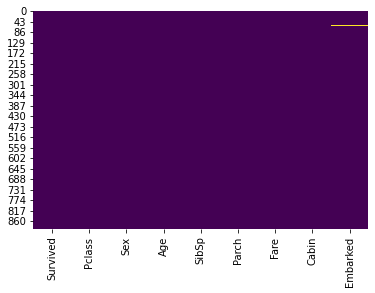

In [88]:
sns.heatmap(df.isna(),cbar=False,cmap="viridis")

In [89]:
#Fill the embarked value
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df["Embarked"] = imputer.fit_transform(df["Embarked"].values.reshape(-1,1))

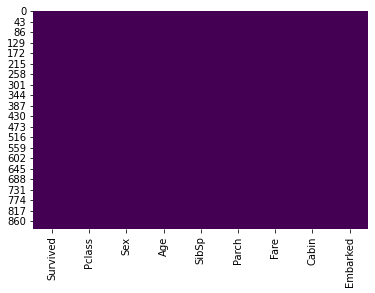

In [90]:
sns.heatmap(df.isna(),cbar=False,cmap="viridis")

### Data Visualization

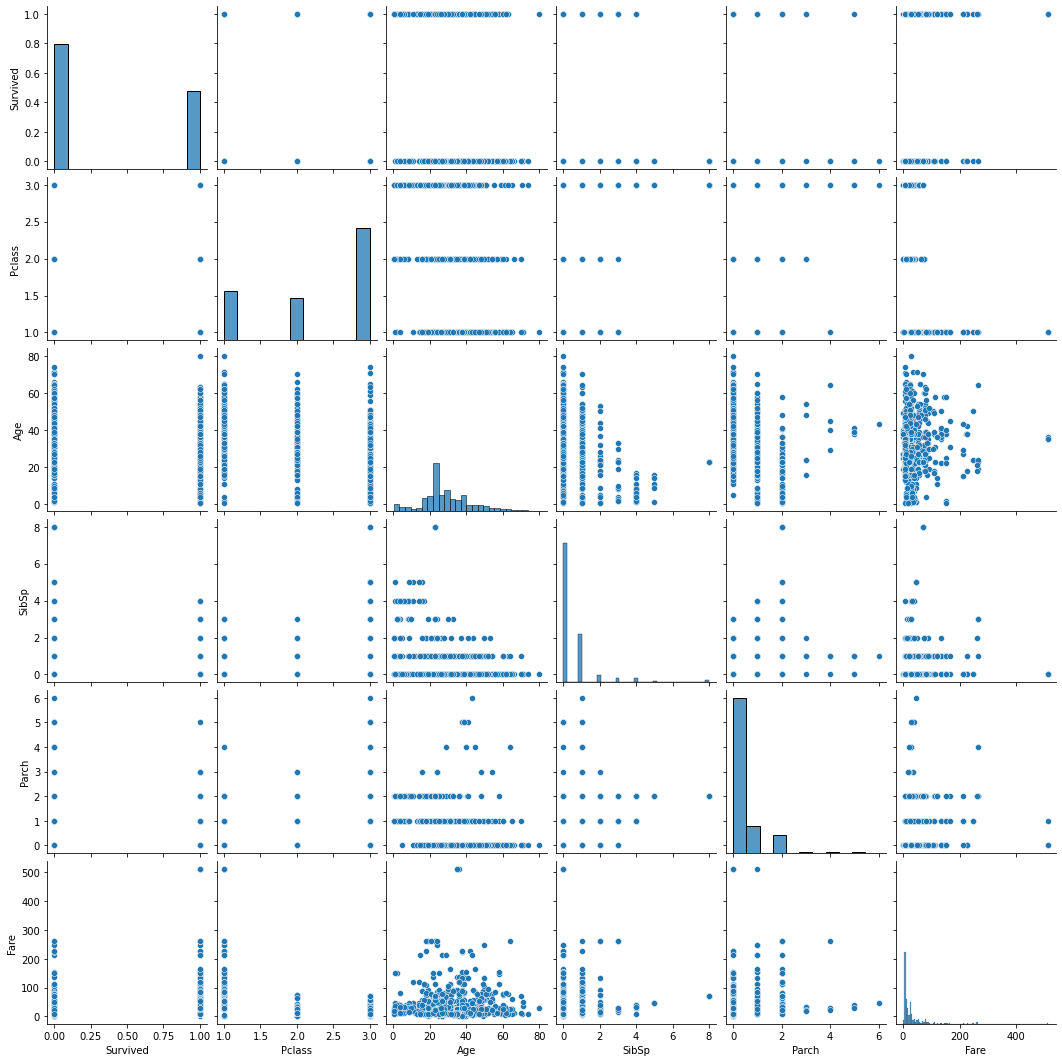

In [91]:
sns.pairplot(df)

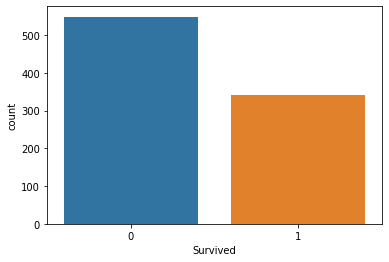

In [92]:
sns.countplot(x="Survived", data = df)

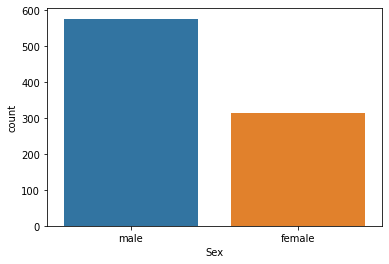

In [93]:
sns.countplot(x="Sex", data=df)

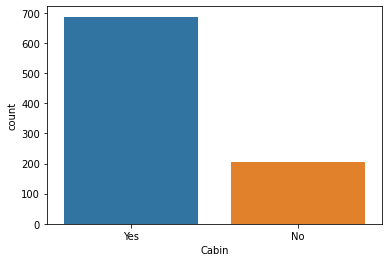

In [94]:
sns.countplot(x="Cabin", data=df)

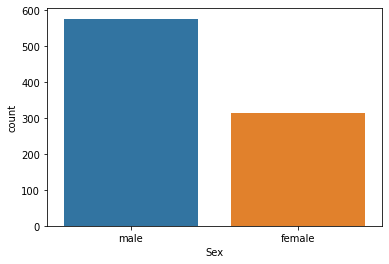

In [95]:
sns.countplot(x="Sex", data=df)

In [96]:
def plot_kde_qqplot(columns):
    for col in columns:
        warnings.filterwarnings("ignore")
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        sns.distplot(df[col])
        plt.subplot(1,2,2)
        probplot(df[col],dist="norm", plot=plt)
        plt.show()

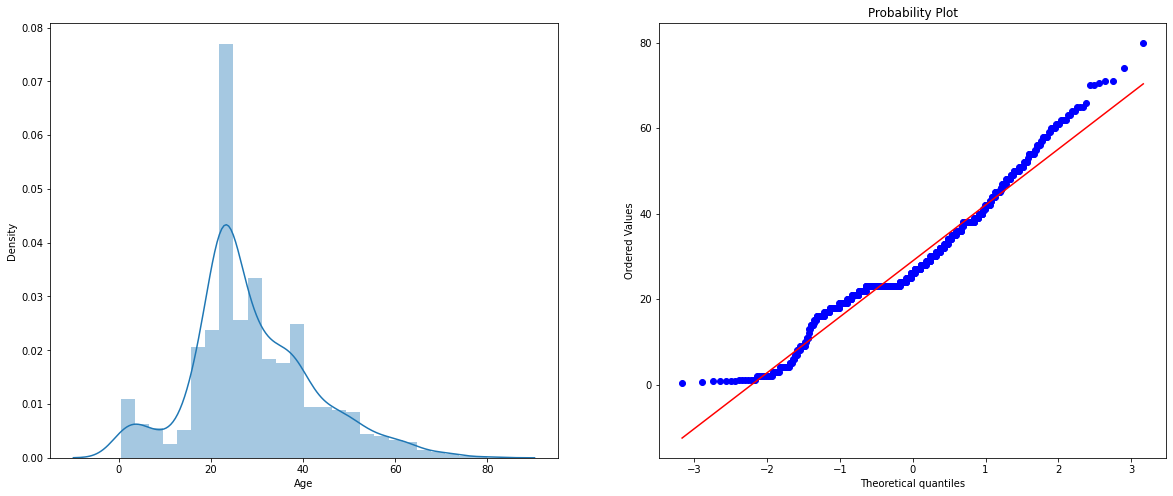

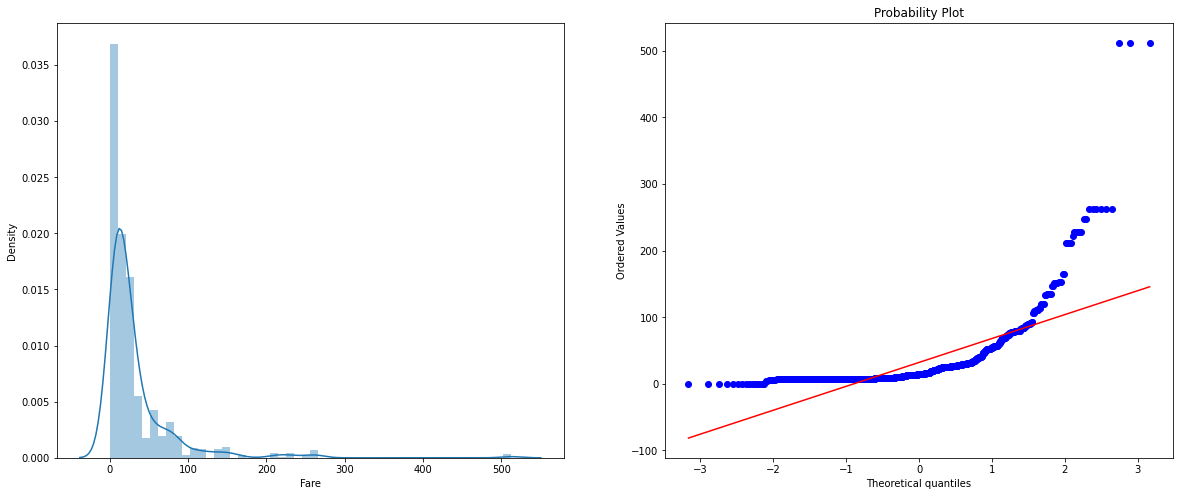

In [97]:
plot_kde_qqplot(columns=["Age","Fare"])

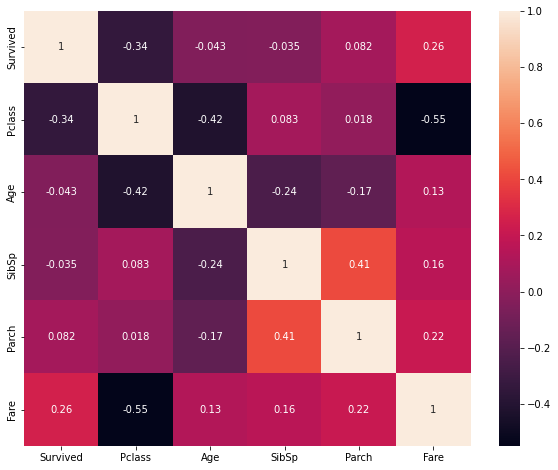

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [99]:
df[["Age","Fare"]] = power_transform(df[["Age","Fare"]],method="yeo-johnson")

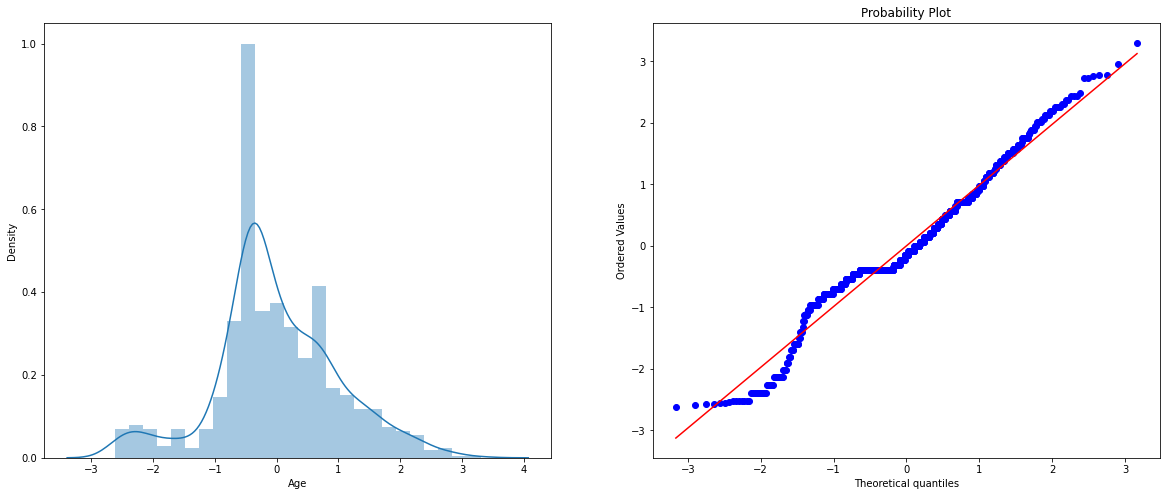

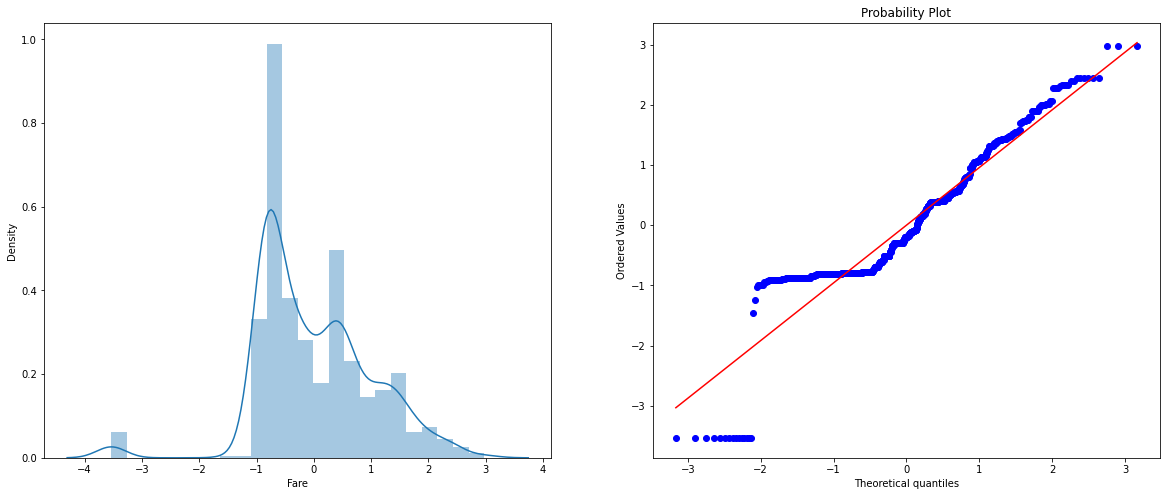

In [100]:
plot_kde_qqplot(columns=["Age","Fare"])

In [101]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,-0.464191,1,0,-0.878820,Yes,S
1,1,1,female,0.709372,1,0,1.336651,No,C
2,1,3,female,-0.154623,0,0,-0.790065,Yes,S
3,1,1,female,0.500956,1,0,1.067352,No,S
4,0,3,male,0.500956,0,0,-0.774439,Yes,S


In [102]:
# Lets create new feature family by adding two features parch, sibsp
def create_feature_family(cols):
    sibsp = cols[0]
    parch = cols[1]
    family = sibsp+parch
    if family<=4:
        return "Small Family"
    elif family==5:
        return "Medium Family"
    else:
        return "Large Family"

In [103]:
df["Family"] = df[["SibSp","Parch"]].apply(create_feature_family,axis=1)

In [104]:
df.drop(labels=["SibSp","Parch"],axis=1, inplace=True)

In [105]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,-0.464191,-0.878820,Yes,S,Small Family
1,1,1,female,0.709372,1.336651,No,C,Small Family
2,1,3,female,-0.154623,-0.790065,Yes,S,Small Family
3,1,1,female,0.500956,1.067352,No,S,Small Family
4,0,3,male,0.500956,-0.774439,Yes,S,Small Family


### Pipeline & Hyperparameter Tunning For Logestic Regression

In [106]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [107]:
preprocessing = ColumnTransformer(
    transformers=[
     (
         "one hot encoding", OneHotEncoder(drop="first",sparse=False),[1,5]
     ),
     (
         "Encode Family", OrdinalEncoder(categories=[["Small Family","Medium Family","Large Family"]]),[-1]
     ),
     (
         "Encode Cabin", OrdinalEncoder(categories=[["No","Yes"]]),[-3]
     )
    ],
    remainder='passthrough'
)

In [111]:
pipeline = Pipeline(
    steps = [
        (
            "preprocessing",preprocessing,
        ),
        (
            "feture_scaling", StandardScaler(),
        ),
        (
            "classifier", LogisticRegression()
        )
    ]
)

In [119]:
param_grid = {
    "classifier__solver": ["newton-cg","lbfgs","liblinear", None],
    "classifier__penalty": ["l1","l2", None],
    "classifier__C": np.logspace(-4,4,20)
}

In [120]:
logestic_regression = GridSearchCV(pipeline, param_grid=param_grid,cv=5, verbose=True, n_jobs=-1)

In [121]:
logestic_regression.fit(X_train,Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoding',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         [1,
                                                                          5]),
                                                                        ('Encode '
                                                                         'Family',
                                                                         OrdinalEncoder(categories=[['Small '
                                                                                                     'Family',
                                                                                                     'Medium '
                                                                                                     'Family',
                                                                                                     'Large '
                                                                                                     'Family']]),
                                                                         [-1]),
                                                                        ('Encode '
                                                                         'Cabin',
                                                                         OrdinalEncoder(categories=[['No',
                                                                                                     'Yes']]),...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'classifier__penalty': ['l1', 'l2', None],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear', None]},
             verbose=True)

In [122]:
logestic_regression.best_params_

{'classifier__C': 0.23357214690901212,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

### Classification Results

In [125]:
logestic_regression.score(X_test,Y_test)

0.8268156424581006

In [126]:
Y_pred = logestic_regression.predict(X_test)

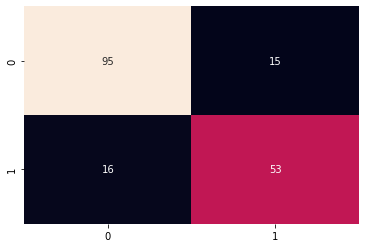

In [129]:
matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix, annot=True, cbar=False)

In [134]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.77      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

